In [1]:
# papermill parameters
zona = 31
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


In [2]:
# Parameters
zona = 37
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


### Importa las librerias

In [3]:

import sys
import os

# Añadir la carpeta raíz del proyecto al sys.path
sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import src.utilidades as uti
import src.graficos as gra
import src.parametros_sismicos as par

from shapely.geometry import Point

importlib.reload(uti)
importlib.reload(par)
importlib.reload(gra)

<module 'src.graficos' from '/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/graficos.py'>

### Lectura del Dataframe

In [4]:
# Leer el DataFrame guardado

filename = f"datos_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename

gdf_2002 = pd.read_pickle(output_file)

gdf_2002.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4460 entries, 20333 to 141430
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Evento        4460 non-null   object        
 1   Latitud       4460 non-null   float64       
 2   Longitud      4460 non-null   float64       
 3   Prof_Km       4460 non-null   float64       
 4   Inten         4460 non-null   object        
 5   Mag           4460 non-null   float64       
 6   Tipo_Mag      4460 non-null   Int64         
 7   Localizacion  4460 non-null   object        
 8   FechaHora     4460 non-null   datetime64[ns]
 9   Mag_mbLgL     4460 non-null   float64       
 10  geometry      4460 non-null   geometry      
 11  Zona_ID       4460 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 457.3+ KB


## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Parámetros de la ley de Gutenberg–Richter (GR)

In [5]:

# Parámetros a y b para todo el catálogo
# Columna constante en todo el dataframe
gdf_2002_1_global,parametros_GR=uti.gutemberg_richter(gdf_2002, col_mag="Mag_mbLgL", min_mag=None)

print(parametros_GR)

# Evolución de los parámetros a y b (ventanas de 50 eventos)
gdf_2002_1 = par.gutemberg_richter_ventana(gdf_2002, col_mag="Mag_mbLgL", n_eventos=50)

gdf_2002_1.tail(15)

{'a_lsq_global': 4.470887189572511, 'b_lsq_global': 0.7997918020668102, 'a_mlk_global': 3.67979351183516, 'b_mlk_global': 0.30458653123018026}


,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk
141261,es2025qfstg,37.7875,-1.6841,0.0,,1.1,4,W ALEDO.MU,2025-08-19 18:32:03,1.1,POINT (-1.6841 37.7875),37.0,2.283786,0.648620,1.988500,0.482549
141269,es2025qgmhq,37.7271,-2.6211,5.0,,1.9,4,NE CASTILLÉJAR.GR,2025-08-20 04:24:38,1.9,POINT (-2.6211 37.7271),37.0,2.276233,0.647931,1.992412,0.489070
141270,es2025qgocd,37.8638,-1.5462,1.0,,1.3,4,NE ALEDO.MU,2025-08-20 05:18:52,1.3,POINT (-1.5462 37.8638),37.0,2.281574,0.645368,1.987219,0.480414
141272,es2025qgpvd,37.9089,-1.6283,30.0,,1.3,4,NW ALEDO.MU,2025-08-20 06:11:17,1.3,POINT (-1.6283 37.9089),37.0,2.278168,0.646591,1.990443,0.485788
141289,es2025qibjg,37.8732,-1.5211,11.0,,1.6,4,W ALHAMA DE MURCIA.MU,2025-08-21 01:09:08,1.6,POINT (-1.5211 37.8732),37.0,2.297176,0.668980,1.997796,0.498044
141294,es2025qimfq,37.8848,-1.5493,0.0,,1.2,4,N ALEDO.MU,2025-08-21 06:38:19,1.2,POINT (-1.5493 37.8848),37.0,2.302559,0.669638,1.995080,0.493516
141330,es2025qluej,38.6408,-1.0601,3.0,,1.3,4,NE YECLA.MU,2025-08-23 02:03:14,1.3,POINT (-1.0601 38.6408),37.0,2.298775,0.668799,1.996432,0.495770
141344,es2025qmmfj,38.3941,-0.8729,8.0,,1.6,4,NE LA ROMANA.A,2025-08-23 11:09:55,1.6,POINT (-0.8729 38.3941),37.0,2.313518,0.674752,1.993740,0.491283
141345,es2025qmppw,38.4436,-0.9659,0.0,,1.4,4,NE EL PINÓS/PINOSO.A,2025-08-23 12:53:07,1.4,POINT (-0.9659 38.4436),37.0,2.315779,0.674375,1.992412,0.489070
141375,es2025qozlq,38.2272,-1.0060,0.0,,1.1,4,NE ABANILLA.MU,2025-08-24 20:07:13,1.1,POINT (-1.006 38.2272),37.0,2.332435,0.681116,1.989144,0.483624


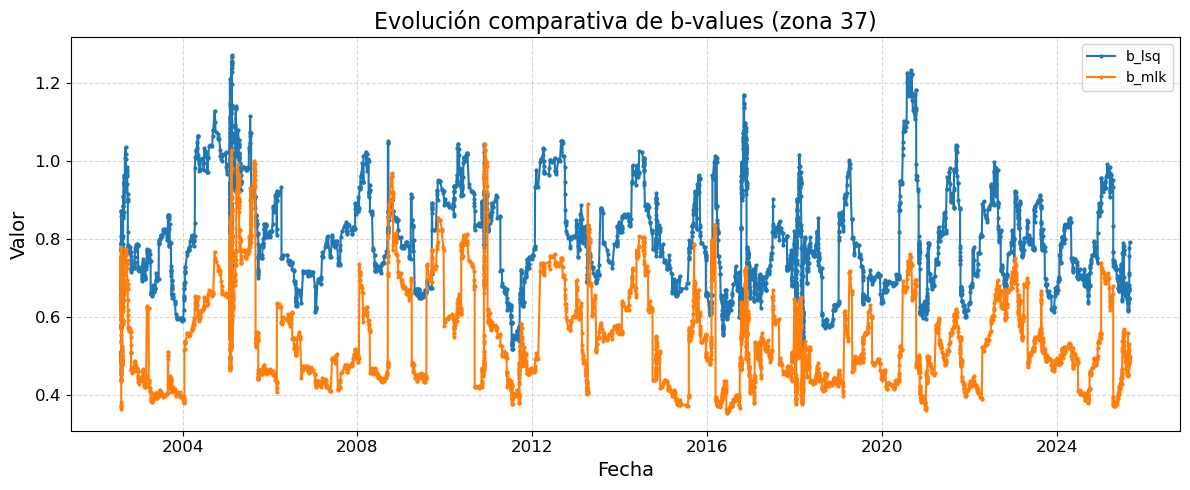

In [6]:
# Comparar evolución de b_lsq y b_mlk

filename = f"Evolución comparativa de b-values (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_1, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq", "b_mlk"], 
   output_file=output_file,
   titulo=filename
   
)

### 2. Tasa media de liberación de energía de Benioff

In [7]:
gdf_2002_2 = par.calcular_tasa_benioff_ventana_rapida(
    gdf_2002_1,
    col_mag="Mag_mbLgL",
    fecha_col="FechaHora",
    T=1.0  # ventana de 1 año
)

gdf_2002_2 .head()

,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk,Tasa_Benioff
20333,301965,37.7153,-2.6407,0.0,,1.9,2,SE CASTILLÉJAR.GR,2002-01-12 13:12:40,0.497755,POINT (-2.6407 37.7153),37.0,NaN,NaN,NaN,NaN,0.000000
20441,306786,37.3566,-2.4025,0.0,,1.9,2,NE ARMUÑA DE ALMANZORA.AL,2002-01-31 01:12:36,0.497755,POINT (-2.4025 37.3566),37.0,NaN,NaN,NaN,NaN,593.357350
20443,306950,37.7688,-2.7261,0.0,,2.1,2,SE CASTRIL.GR,2002-01-31 17:34:55,0.747143,POINT (-2.7261 37.7688),37.0,NaN,NaN,NaN,NaN,839.134012
20529,309824,37.9532,-1.4229,10.2,,1.9,2,SE PLIEGO.MU,2002-02-10 01:55:33,0.497755,POINT (-1.4229 37.9532),37.0,NaN,NaN,NaN,NaN,1239.870474
20606,313435,38.4248,-1.1685,4.5,,1.8,2,SE JUMILLA.MU,2002-02-24 06:55:59,0.373061,POINT (-1.1685 38.4248),37.0,NaN,NaN,NaN,NaN,1374.536917


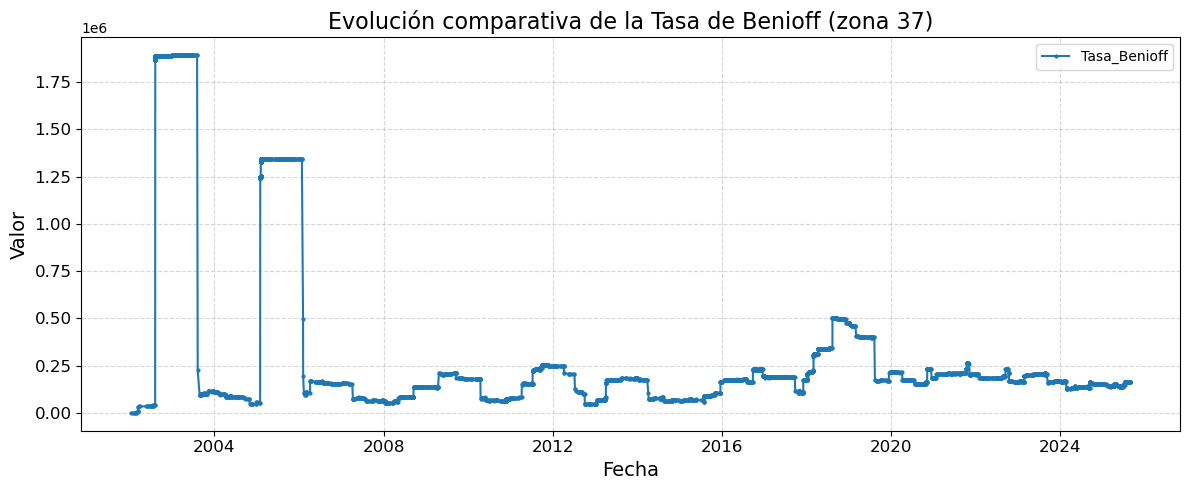

In [8]:
# Comparar evolución de la Tasa de Benioff
filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_2, 
   fecha_col="FechaHora", 
   param_cols=["Tasa_Benioff"], 
   output_file=output_file,
   titulo=filename
   
)

### 3. Tiempo de n eventos

In [9]:
gdf_2002_3 = par.tiempo_desde_evento_n_rapido(
    gdf_2002_2,
    n=50,                  # mirar 50 eventos atrás
    fecha_col="FechaHora",
    unidad="days",
    nueva_col="Tiempo_50_eventos"
)

gdf_2002_3[["FechaHora", "Tiempo_50_eventos"]].tail(15)


,FechaHora,Tiempo_50_eventos
141261,2025-08-19 18:32:03,51.710081
141269,2025-08-20 04:24:38,52.066181
141270,2025-08-20 05:18:52,51.415000
141272,2025-08-20 06:11:17,51.012731
141289,2025-08-21 01:09:08,51.663519
141294,2025-08-21 06:38:19,49.374144
141330,2025-08-23 02:03:14,49.167593
141344,2025-08-23 11:09:55,47.868704
141345,2025-08-23 12:53:07,45.504525
141375,2025-08-24 20:07:13,46.686921


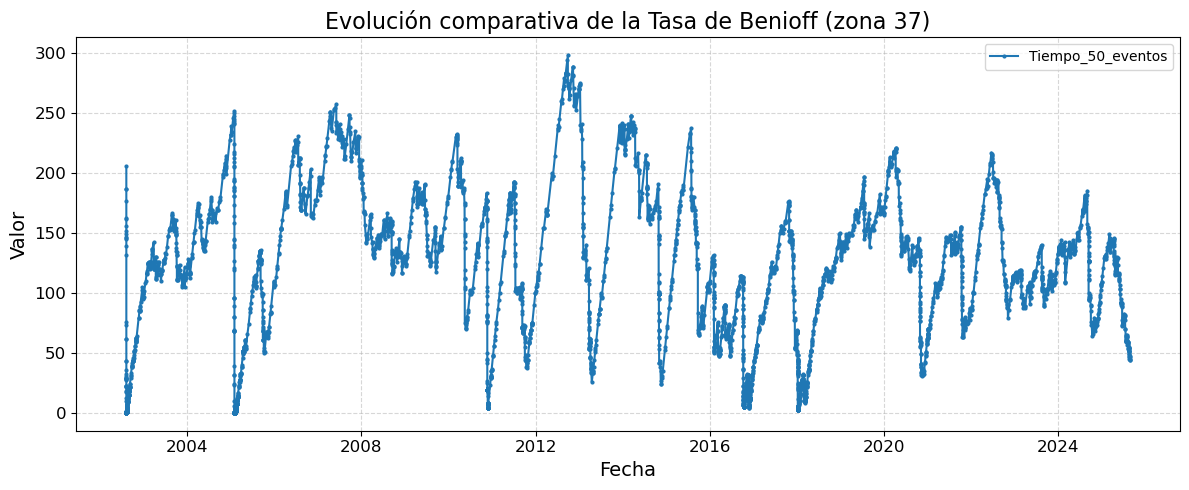

In [10]:
# Comparar evolución de Tiempo_50_eventos

filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_3, 
   fecha_col="FechaHora", 
   param_cols=["Tiempo_50_eventos"], 
   output_file=output_file,
   titulo=filename
       
)

### 4. Magnitud media en n eventos previos

In [11]:
gdf_2002_4 = par.magnitud_media_eventos_previos(
    gdf_2002_3,
    n=50,                     # mirar 50 eventos atrás
    col_mag="Mag_mbLgL",
    nueva_col="Mag_media_50"
)

gdf_2002_4[["FechaHora","Mag_mbLgL", "Mag_media_50"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_50
141261,2025-08-19 18:32:03,1.1,1.500
141269,2025-08-20 04:24:38,1.9,1.488
141270,2025-08-20 05:18:52,1.3,1.504
141272,2025-08-20 06:11:17,1.3,1.494
141289,2025-08-21 01:09:08,1.6,1.472
141294,2025-08-21 06:38:19,1.2,1.480
141330,2025-08-23 02:03:14,1.3,1.476
141344,2025-08-23 11:09:55,1.6,1.484
141345,2025-08-23 12:53:07,1.4,1.488
141375,2025-08-24 20:07:13,1.1,1.498


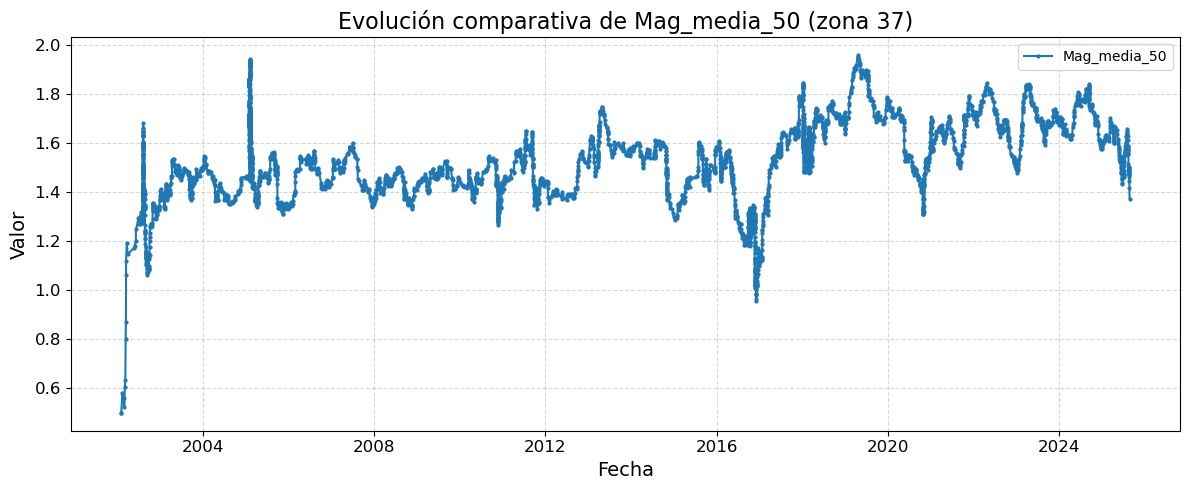

In [12]:
# Comparar evolución de Mag_media_50
filename = f"Evolución comparativa de Mag_media_50 (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_4, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_50"], 
   output_file=output_file,
   titulo=filename
   
)

### 5. Valor medio y desviación estándar de la magnitud en los últimos 30 días

In [13]:
gdf_2002_5 = par.estadisticas_magnitud_ventana(gdf_2002_4, fecha_col="FechaHora", mag_col="Mag_mbLgL", dias=30)

gdf_2002_5[["FechaHora", "Mag_mbLgL", "Mag_media_30d", "Mag_std_30d"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_30d,Mag_std_30d
4445,2025-08-19 18:32:03,1.1,1.330000,0.475721
4446,2025-08-20 04:24:38,1.9,1.348387,0.478798
4447,2025-08-20 05:18:52,1.3,1.346875,0.471090
4448,2025-08-20 06:11:17,1.3,1.345455,0.463742
4449,2025-08-21 01:09:08,1.6,1.352941,0.458744
4450,2025-08-21 06:38:19,1.2,1.364706,0.449162
4451,2025-08-23 02:03:14,1.3,1.332258,0.449731
4452,2025-08-23 11:09:55,1.6,1.340625,0.444942
4453,2025-08-23 12:53:07,1.4,1.342424,0.438057
4454,2025-08-24 20:07:13,1.1,1.335294,0.433368


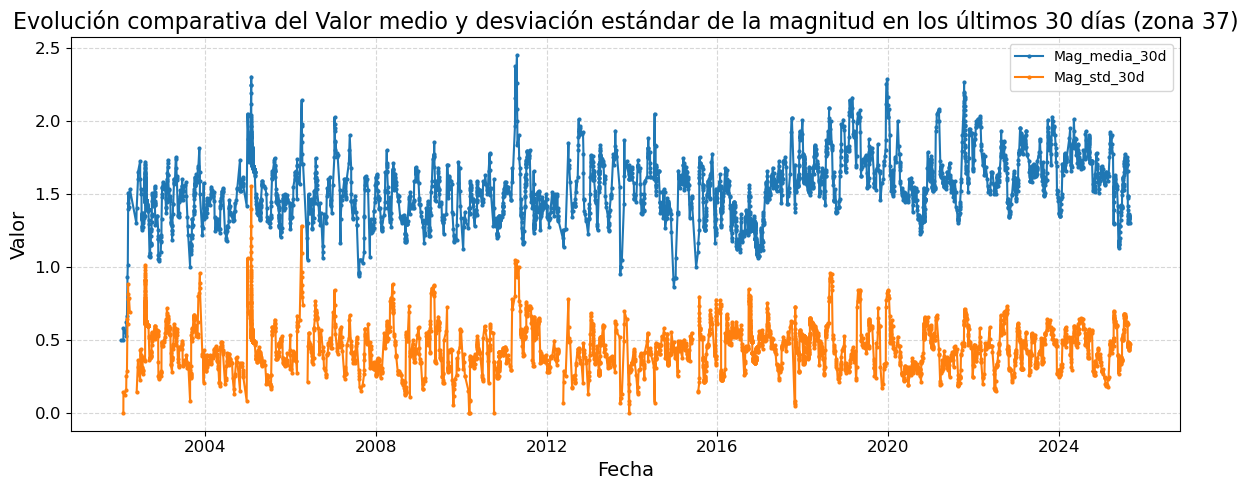

In [14]:
# Comparar evolución de Mag_media_30d y Mag_std_30d
filename = f"Evolución comparativa del Valor medio y desviación estándar de la magnitud en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_5, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_30d","Mag_std_30d"], 
   output_file=output_file,
   titulo=filename
)

### 6a. Cambios en la tasa sísmica (z-value)

In [15]:
gdf_2002_6a = par.calcular_z_value_vectorizado(
    gdf_2002_5, fecha_col="FechaHora", T=30, col_out="z_30d_eventos"
)

gdf_2002_6a[["FechaHora", "z_30d_eventos"]].tail(20)

,FechaHora,z_30d_eventos
4440,2025-08-17 06:20:27,0.227261
4441,2025-08-17 20:30:09,0.227261
4442,2025-08-17 21:33:36,0.227261
4443,2025-08-18 13:29:51,0.110922
4444,2025-08-18 14:54:26,0.110922
4445,2025-08-19 18:32:03,0.332485
4446,2025-08-20 04:24:38,0.222840
4447,2025-08-20 05:18:52,0.222840
4448,2025-08-20 06:11:17,0.222840
4449,2025-08-21 01:09:08,0.547685


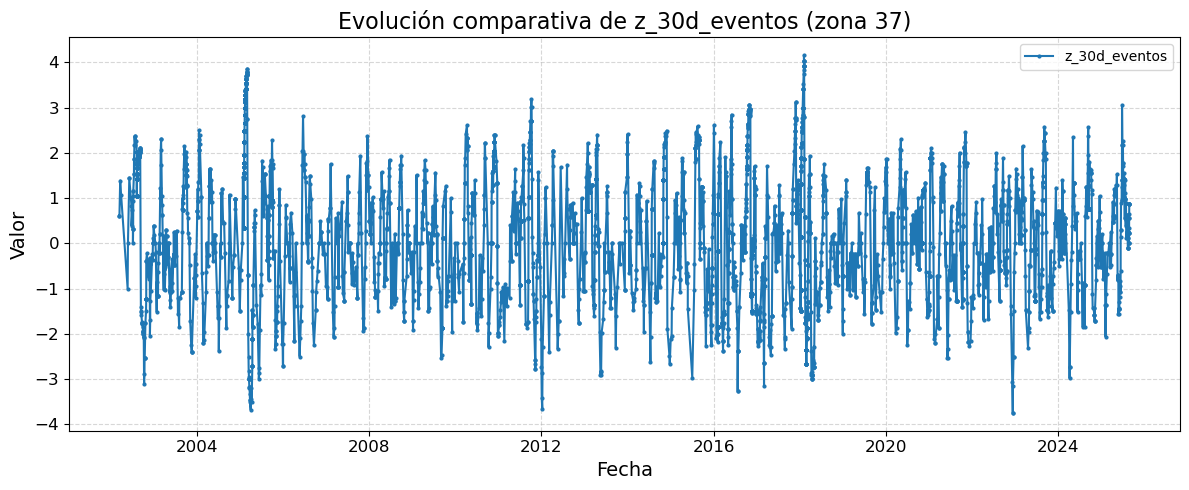

In [16]:
# Comparar evolución de z_30d_eventos
filename = f"Evolución comparativa de z_30d_eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6a, 
   fecha_col="FechaHora", 
   param_cols=["z_30d_eventos"], 
   output_file=output_file,
   titulo=filename
)

### 6b. Cambios en la tasa sísmica (beta-value)

In [17]:
gdf_2002_6b = par.calcular_beta_value(gdf_2002_6a, fecha_col="FechaHora", ventana_dias=30)

gdf_2002_6b[["FechaHora", "M_obs", "Beta_value"]].tail(15)


,FechaHora,M_obs,Beta_value
4445,2025-08-19 18:32:03,30.0,3.687908
4446,2025-08-20 04:24:38,33.0,4.451136
4447,2025-08-20 05:18:52,33.0,4.451136
4448,2025-08-20 06:11:17,33.0,4.451136
4449,2025-08-21 01:09:08,34.0,4.705546
4450,2025-08-21 06:38:19,34.0,4.705546
4451,2025-08-23 02:03:14,33.0,4.451136
4452,2025-08-23 11:09:55,33.0,4.451136
4453,2025-08-23 12:53:07,33.0,4.451136
4454,2025-08-24 20:07:13,34.0,4.705546


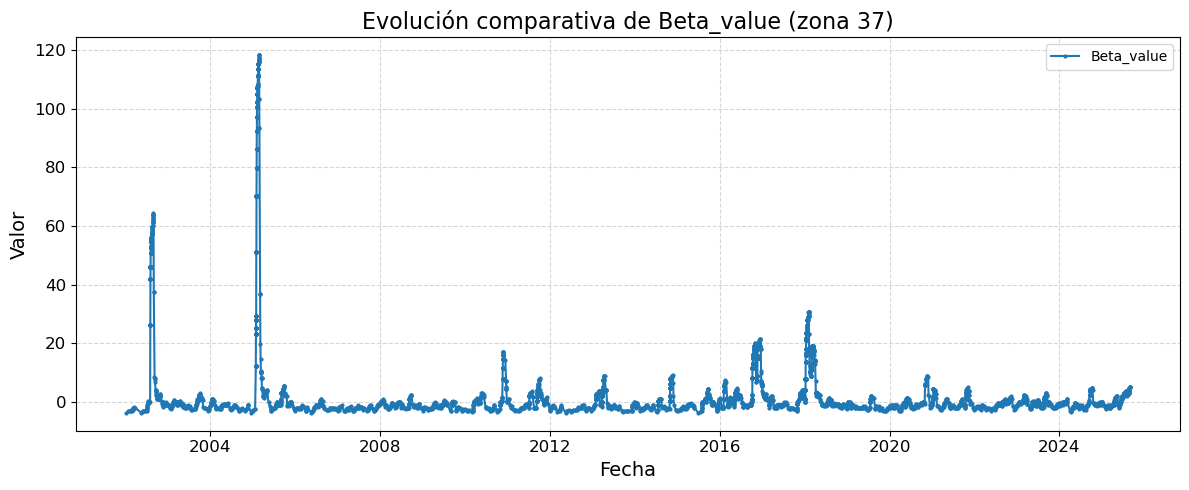

In [18]:
# Comparar evolución de Beta_value
filename = f"Evolución comparativa de Beta_value (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6b, 
   fecha_col="FechaHora", 
   param_cols=["Beta_value"], 
   output_file=output_file,
   titulo=filename
)

### 7. Magnitud máxima en los T días previos

In [19]:
# Calcular magnitud máxima en ventanas de 30, 90 y 180 días
gdf_2002_7 = par.agregar_magnitud_max_multiventana(
    gdf_2002_6b,
    fecha_col="FechaHora",
    mag_col="Mag_mbLgL",
    ventanas=[30, 90, 180]
)

# Verificar las nuevas columnas
gdf_2002_7[["FechaHora", "MagMax_30d", "MagMax_90d", "MagMax_180d"]].tail()


,FechaHora,MagMax_30d,MagMax_90d,MagMax_180d
4455,2025-08-25 20:37:02,2.5,3.2,3.2
4456,2025-08-25 21:31:46,2.5,3.2,3.2
4457,2025-08-26 02:00:04,2.5,3.2,3.2
4458,2025-08-26 21:21:20,2.5,3.2,3.2
4459,2025-08-28 00:37:12,2.5,3.2,3.2


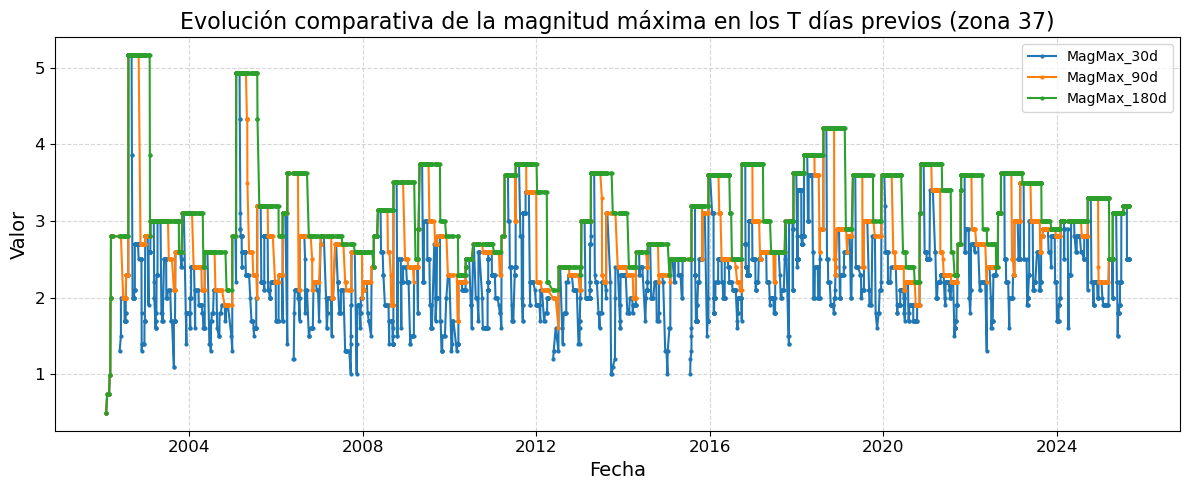

In [20]:
# Comparar evolución de la magnitud máxima en los T días previos

filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_7, 
   fecha_col="FechaHora", 
   param_cols=["MagMax_30d","MagMax_90d","MagMax_180d"], 
   output_file=output_file,
   titulo=filename
)

### 8. Profundidad media en los T días previos

In [21]:
# Calcular profundidad media en los últimos 30 días
gdf_2002_8 = par.agregar_profundidad_media_multiventana(gdf_2002_7, fecha_col="FechaHora", prof_col="Prof_Km", ventanas=[30])

# Verificar
gdf_2002_8[["FechaHora", "ProfMedia_30d"]].tail()


,FechaHora,ProfMedia_30d
4455,2025-08-25 20:37:02,7.529412
4456,2025-08-25 21:31:46,7.628571
4457,2025-08-26 02:00:04,7.628571
4458,2025-08-26 21:21:20,7.371429
4459,2025-08-28 00:37:12,7.527778


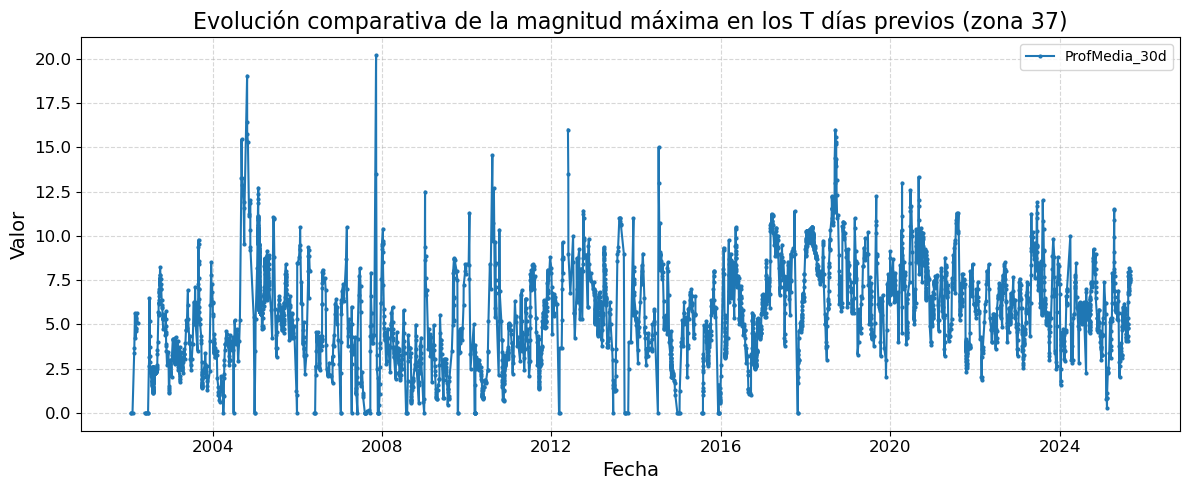

In [22]:
# Comparar evolución de la profundidad media en los T días previos
filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_8, 
   fecha_col="FechaHora", 
   param_cols=["ProfMedia_30d"], 
   output_file=output_file,
   titulo=filename
)

### 9. Tiempo desde el último terremoto

In [23]:
gdf_2002_9 = par.agregar_tiempo_desde_ultimo(gdf_2002_8, fecha_col="FechaHora", unidad="dias")

# Verificar
gdf_2002_9[["FechaHora", "TiempoDesdeUltimo"]].tail(15)


,FechaHora,TiempoDesdeUltimo
4445,2025-08-19 18:32:03,1.151123
4446,2025-08-20 04:24:38,0.411516
4447,2025-08-20 05:18:52,0.037662
4448,2025-08-20 06:11:17,0.036400
4449,2025-08-21 01:09:08,0.790174
4450,2025-08-21 06:38:19,0.228600
4451,2025-08-23 02:03:14,1.808970
4452,2025-08-23 11:09:55,0.379641
4453,2025-08-23 12:53:07,0.071667
4454,2025-08-24 20:07:13,1.301458


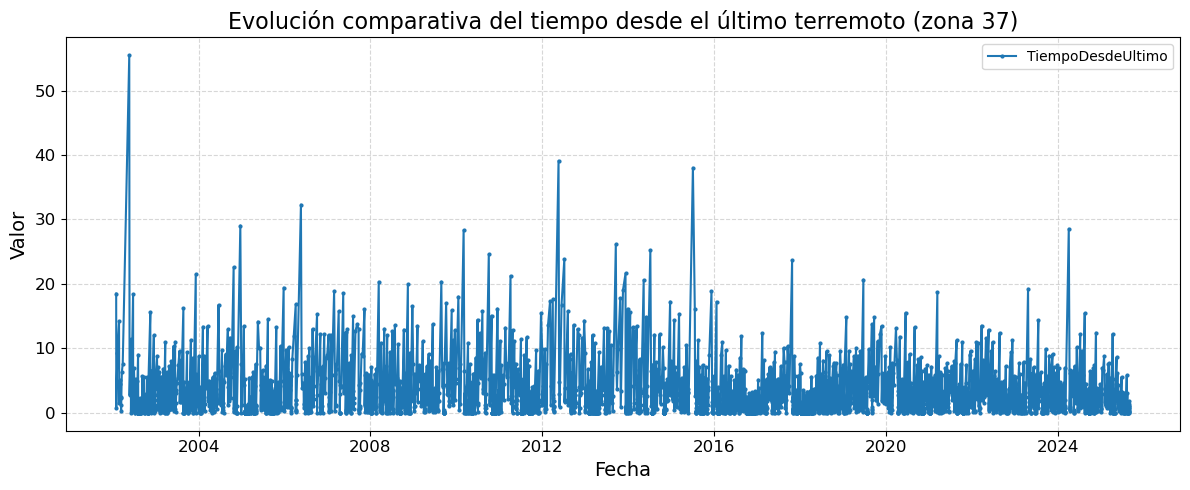

In [24]:
# Comparar evolución del tiempo desde el último terremoto 
filename = f"Evolución comparativa del tiempo desde el último terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_9, 
   fecha_col="FechaHora", 
   param_cols=["TiempoDesdeUltimo"], 
   output_file=output_file,
   titulo=filename
)

### 10. Tiempo transcurrido entre los últimos n eventos

In [25]:
# Calcular tiempo transcurrido entre el primer y último de los 5 eventos previos
gdf_2002_10 = par.agregar_tiempo_ventana_eventos_vector(gdf_2002_9, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_10[["FechaHora", "TiempoVentana_5Eventos"]].tail(10)

/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:883: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoVentana_5Eventos
4450,2025-08-21 06:38:19,1.092836
4451,2025-08-23 02:03:14,2.864144
4452,2025-08-23 11:09:55,3.207384
4453,2025-08-23 12:53:07,2.488877
4454,2025-08-24 20:07:13,3.561736
4455,2025-08-25 20:37:02,2.773472
4456,2025-08-25 21:31:46,2.431840
4457,2025-08-26 02:00:04,2.546493
4458,2025-08-26 21:21:20,2.051470
4459,2025-08-28 00:37:12,2.166782


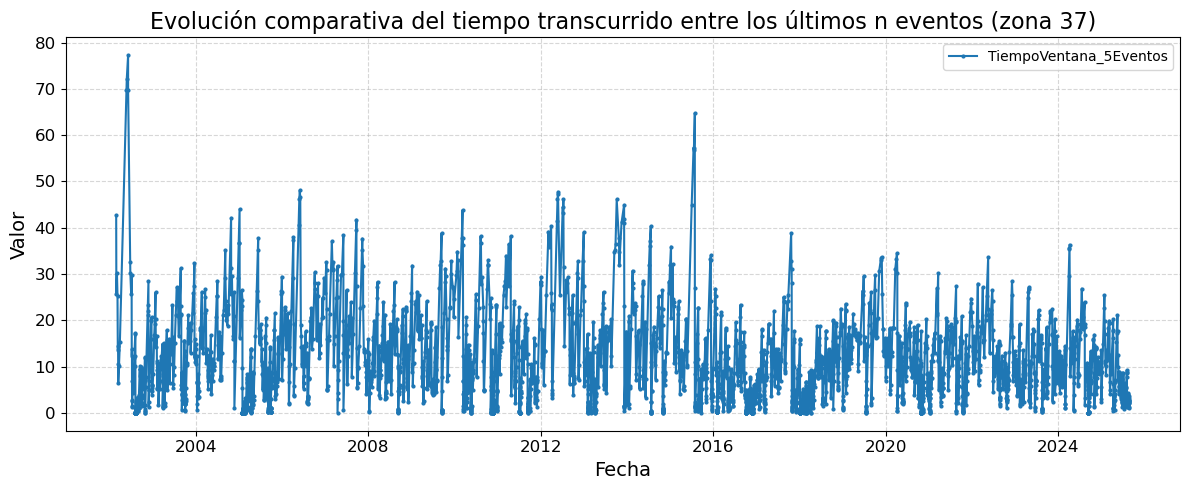

In [26]:
# Comparar evolución del tiempo transcurrido entre los últimos n eventos
filename = f"Evolución comparativa del tiempo transcurrido entre los últimos n eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_10, 
   fecha_col="FechaHora", 
   param_cols=["TiempoVentana_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 11. Tiempo medio entre eventos

In [27]:
# Calcular tiempo medio entre eventos de los últimos 5 eventos
gdf_2002_11 = par.agregar_tiempo_medio_ventana_eventos(gdf_2002_10, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_11[["FechaHora", "TiempoMedio_5Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:947: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoMedio_5Eventos
4450,2025-08-21 06:38:19,0.273209
4451,2025-08-23 02:03:14,0.716036
4452,2025-08-23 11:09:55,0.801846
4453,2025-08-23 12:53:07,0.622219
4454,2025-08-24 20:07:13,0.890434
4455,2025-08-25 20:37:02,0.693368
4456,2025-08-25 21:31:46,0.607960
4457,2025-08-26 02:00:04,0.636623
4458,2025-08-26 21:21:20,0.512867
4459,2025-08-28 00:37:12,0.541696


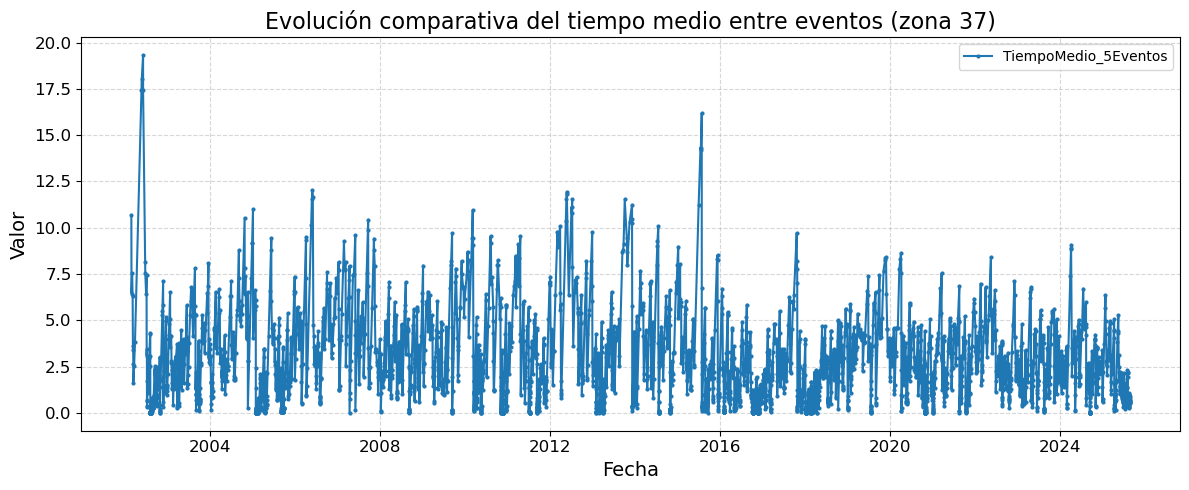

In [28]:
# Comparar evolución del tiempo medio entre eventos
filename = f"Evolución comparativa del tiempo medio entre eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_11, 
   fecha_col="FechaHora", 
   param_cols=["TiempoMedio_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 12. Coeficiente de variación

In [29]:
# Calcular coeficiente de variación para ventanas de 5 eventos
gdf_2002_12 = par.agregar_coeficiente_variacion(gdf_2002_11, fecha_col="FechaHora", n_eventos=50)

# Verificar
gdf_2002_12[["FechaHora", "CoefVar_50Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:1011: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,CoefVar_50Eventos
4450,2025-08-21 06:38:19,1.169050
4451,2025-08-23 02:03:14,1.167762
4452,2025-08-23 11:09:55,1.201706
4453,2025-08-23 12:53:07,1.203756
4454,2025-08-24 20:07:13,1.163106
4455,2025-08-25 20:37:02,1.166844
4456,2025-08-25 21:31:46,1.177010
4457,2025-08-26 02:00:04,1.171068
4458,2025-08-26 21:21:20,1.141425
4459,2025-08-28 00:37:12,1.124853


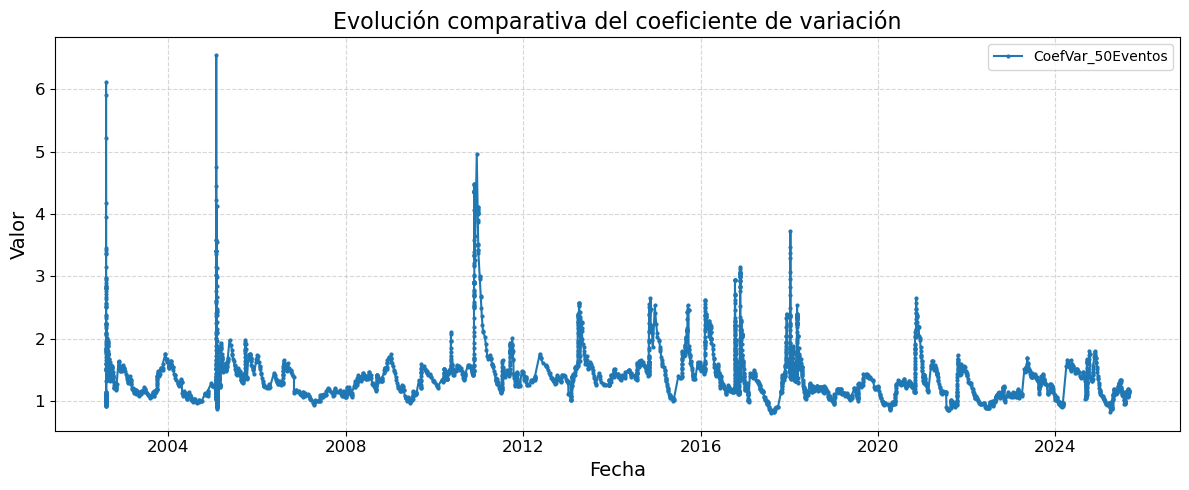

In [30]:
# Comparar evolución del coeficiente de variación
gra.plot_evolucion_multi(
   gdf_2002_12, 
   fecha_col="FechaHora", 
   param_cols=["CoefVar_50Eventos"], 
   titulo="Evolución comparativa del coeficiente de variación",
   
)

### 13. Número de terremotos en los últimos 30 días

In [31]:
# Contar eventos ocurridos en los últimos 30 días
gdf_2002_13 = par.contar_eventos_ultimos_T_dias(gdf_2002_12, fecha_col="FechaHora", T=30)

# Verificar
gdf_2002_13[["FechaHora", "NumEventosUltimos_30dias"]].tail(15)


,FechaHora,NumEventosUltimos_30dias
4445,2025-08-19 18:32:03,30.0
4446,2025-08-20 04:24:38,31.0
4447,2025-08-20 05:18:52,32.0
4448,2025-08-20 06:11:17,33.0
4449,2025-08-21 01:09:08,34.0
4450,2025-08-21 06:38:19,34.0
4451,2025-08-23 02:03:14,31.0
4452,2025-08-23 11:09:55,32.0
4453,2025-08-23 12:53:07,33.0
4454,2025-08-24 20:07:13,34.0


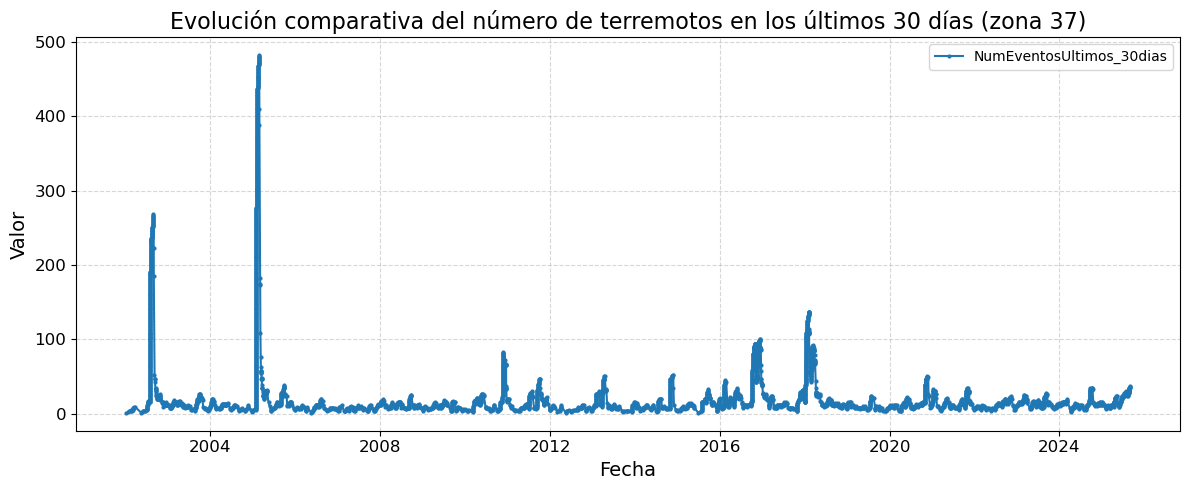

In [32]:
# Comparar evolución del número de terremotos en los últimos 30 días
filename = f"Evolución comparativa del número de terremotos en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_13, 
   fecha_col="FechaHora", 
   param_cols=["NumEventosUltimos_30dias"], 
   output_file=output_file,
   titulo=filename
)

## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Probabilidad de ocurrencia de un terremoto

In [33]:
# Cálculo de la magnitud de completitud
mc_opt = uti.estimar_mc_optimo(gdf_2002_13, col_mag="Mag_mbLgL", bins=0.1, threshold=0.9)

print('Magnitud de completitud: ', mc_opt)

Magnitud de completitud:  1.3


In [34]:

# Cálculo de la probabilidad de ocurrencia de un terremoto para varias magnitudes

gdf_2002_14 = par.agregar_prob_ocurrencia(gdf_2002_13, ["b_lsq", "b_mlk"], M_list=[3.5, 4.0, 4.5], Mmin=mc_opt)

# Verificar
gdf_2002_14[["FechaHora", "b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5","b_mlk_prob_M3.5","b_mlk_prob_M4.0","b_mlk_prob_M4.5"]].tail(15)
#gdf_2002_14.tail(15)

,FechaHora,b_lsq_prob_M3.5,b_lsq_prob_M4.0,b_lsq_prob_M4.5,b_mlk_prob_M3.5,b_mlk_prob_M4.0,b_mlk_prob_M4.5
4445,2025-08-19 18:32:03,0.037414,0.017731,0.008403,0.086774,0.049787,0.028566
4446,2025-08-20 04:24:38,0.037545,0.017807,0.008445,0.083955,0.047809,0.027225
4447,2025-08-20 05:18:52,0.038036,0.018093,0.008606,0.087718,0.050452,0.029018
4448,2025-08-20 06:11:17,0.037801,0.017956,0.008529,0.085362,0.048795,0.027892
4449,2025-08-21 01:09:08,0.033748,0.015623,0.007232,0.080224,0.045215,0.025483
4450,2025-08-21 06:38:19,0.033635,0.015559,0.007197,0.082085,0.046506,0.026348
4451,2025-08-23 02:03:14,0.033779,0.015640,0.007242,0.081153,0.045859,0.025914
4452,2025-08-23 11:09:55,0.032775,0.015072,0.006931,0.083019,0.047156,0.026785
4453,2025-08-23 12:53:07,0.032838,0.015107,0.006950,0.083955,0.047809,0.027225
4454,2025-08-24 20:07:13,0.031735,0.014487,0.006613,0.086303,0.049456,0.028340


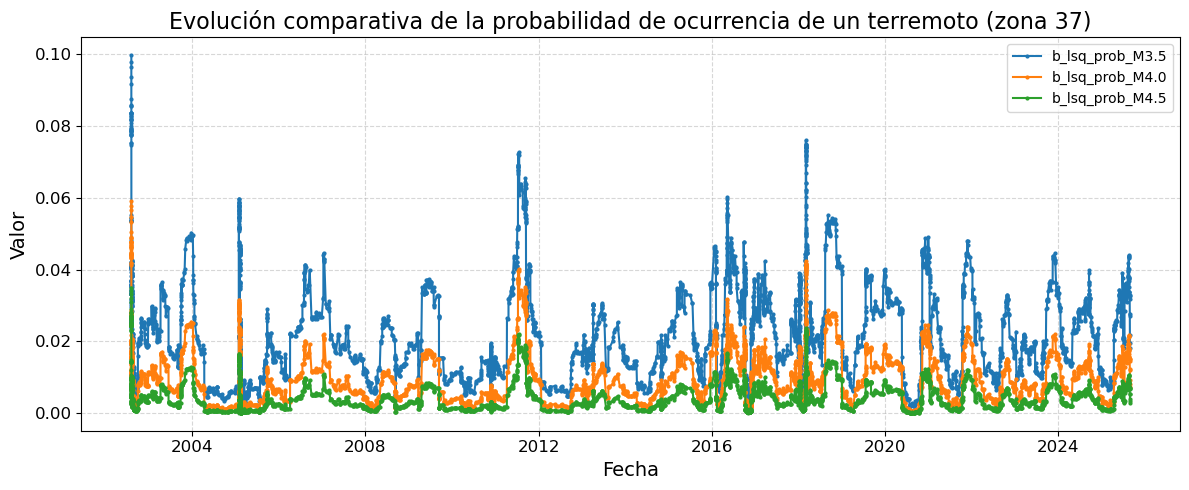

In [35]:
# Comparar evolución de la probabilidad de ocurrencia de un terremoto
filename = f"Evolución comparativa de la probabilidad de ocurrencia de un terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_14, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5"], 
   output_file=output_file,
   titulo=filename
)

### 2. Desviación de la Ley de Gutenberg-Richer
### a) Utiliza una ventana de T dias previos al evento seleccionado

In [36]:
gdf_2002_15 = par.eta_numba_vector(
    gdf_2002_14,
    fecha_col="FechaHora",
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    dias=30
)

gdf_2002_15[["FechaHora", "eta_T_lsq", "eta_T_mlk"]].tail()

,FechaHora,eta_T_lsq,eta_T_mlk
4455,2025-08-25 20:37:02,0.492760,0.353250
4456,2025-08-25 21:31:46,0.490515,0.356363
4457,2025-08-26 02:00:04,0.523237,0.363389
4458,2025-08-26 21:21:20,0.563264,0.387935
4459,2025-08-28 00:37:12,0.555087,0.359328


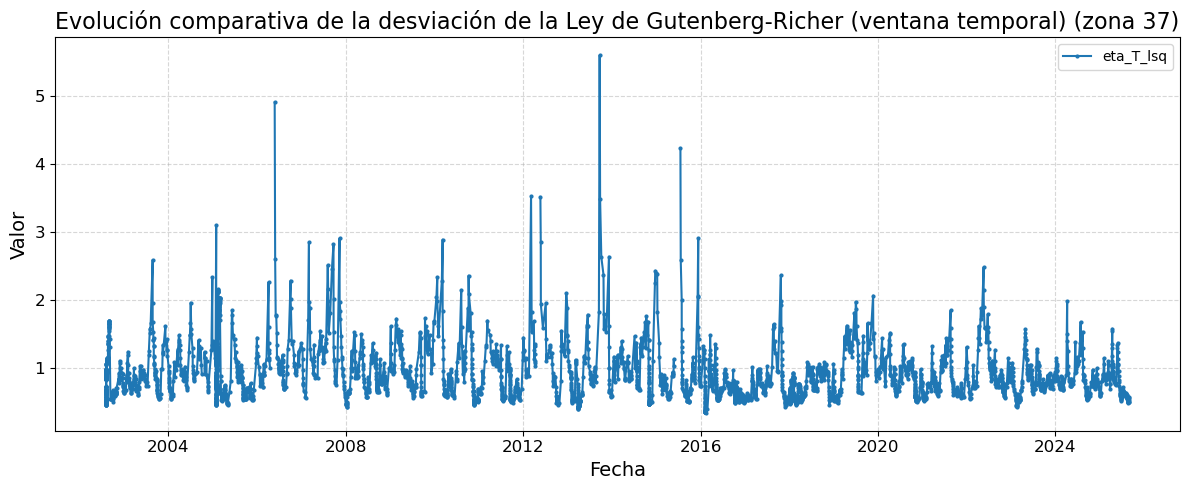

In [37]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana temporal)
  
filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_15, 
   fecha_col="FechaHora", 
   param_cols=["eta_T_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [38]:
gdf_2002_16 = par.eta_ventana_eventos(
    gdf_2002_15, 
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    n_eventos=50
)

gdf_2002_16[["FechaHora","eta_N_lsq", "eta_N_mlk"]].tail()

,FechaHora,eta_N_lsq,eta_N_mlk
4455,2025-08-25 20:37:02,4.768017,2.623748
4456,2025-08-25 21:31:46,4.744194,2.610296
4457,2025-08-26 02:00:04,4.549000,2.486210
4458,2025-08-26 21:21:20,4.479338,2.435663
4459,2025-08-28 00:37:12,4.330440,2.327961


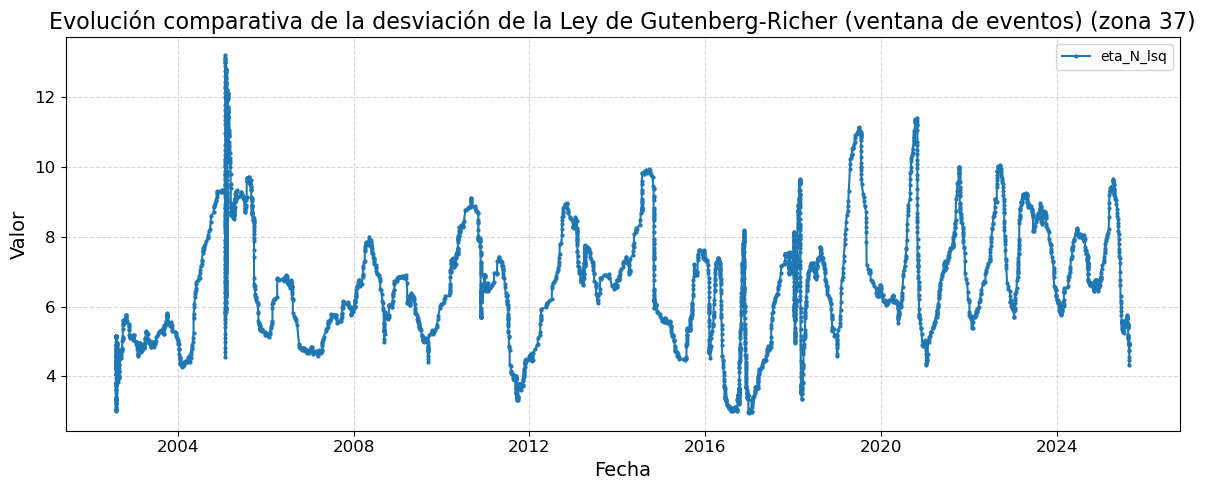

In [39]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana de eventos)

filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_16, 
   fecha_col="FechaHora", 
   param_cols=["eta_N_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 3. Desviación estándar del parámetro b

### a) Utiliza una ventana de T dias previos al evento seleccionado

In [40]:
# Por ventana de días
gdf_2002_17 = par.agregar_sigma_b_tiempo(gdf_2002_16, fecha_col="FechaHora", col_mag="Mag_mbLgL",
                                b_lsq="b_lsq", b_mlk="b_mlk", dias=30)

gdf_2002_17.tail()[["FechaHora", "sigma_b_lsq_30d", "sigma_b_mlk_30d"]]


,FechaHora,sigma_b_lsq_30d,sigma_b_mlk_30d
4455,2025-08-25 20:37:02,0.084826,0.041724
4456,2025-08-25 21:31:46,0.086103,0.043469
4457,2025-08-26 02:00:04,0.099462,0.046173
4458,2025-08-26 21:21:20,0.109948,0.051386
4459,2025-08-28 00:37:12,0.112475,0.044231


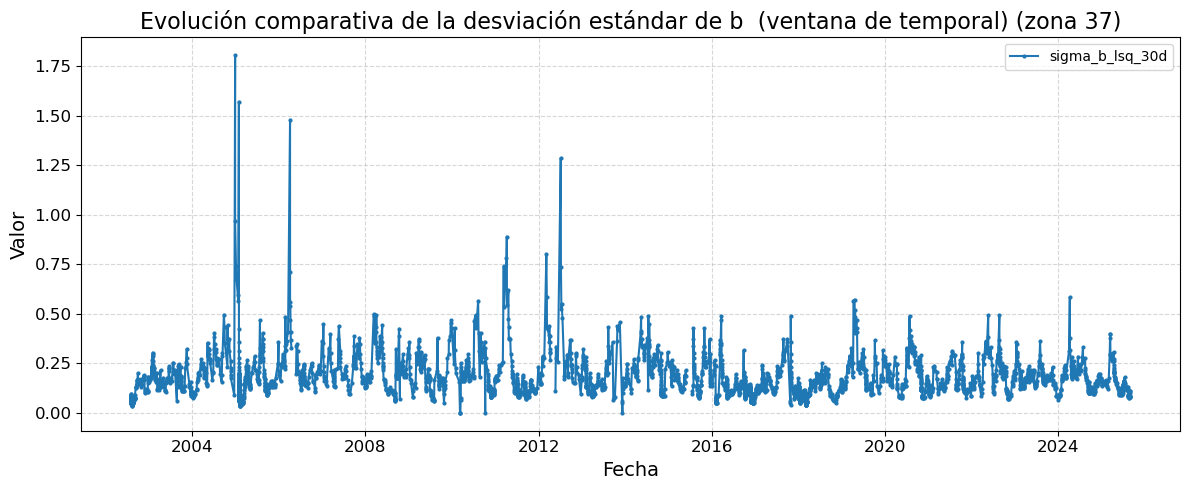

In [41]:
# Comparar evolución de la desviación estándar de b  (ventana de temporal)
filename = f"Evolución comparativa de la desviación estándar de b  (ventana de temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_17,
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_30d"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [42]:
# Por número de eventos
gdf_2002_18 = par.agregar_sigma_b_eventos(gdf_2002_17, col_mag="Mag_mbLgL", b_lsq="b_lsq", b_mlk="b_mlk", n_eventos=50)

gdf_2002_18.tail()[["FechaHora", "sigma_b_lsq_50ev", "sigma_b_mlk_50ev"]]
#gdf_2002_18.tail()

,FechaHora,sigma_b_lsq_50ev,sigma_b_mlk_50ev
4455,2025-08-25 20:37:02,0.089994,0.044267
4456,2025-08-25 21:31:46,0.080972,0.040878
4457,2025-08-26 02:00:04,0.091095,0.042289
4458,2025-08-26 21:21:20,0.092595,0.043276
4459,2025-08-28 00:37:12,0.094922,0.037328


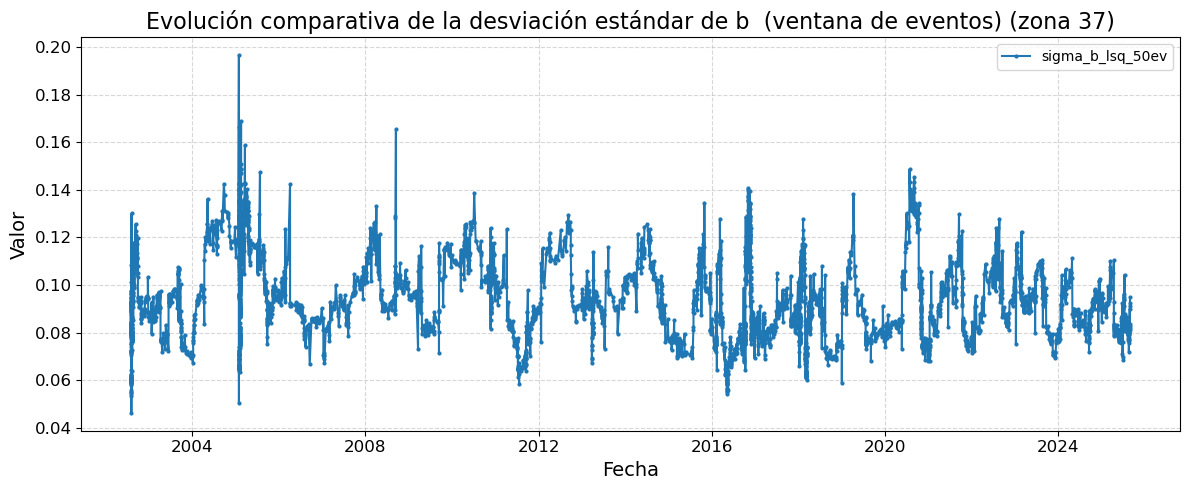

In [43]:
# Comparar evolución de la desviación estándar de b  (ventana de eventos)

filename = f"Evolución comparativa de la desviación estándar de b  (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_18, 
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_50ev"], 
   output_file=output_file,
   titulo=filename
)

### 4. Déficit de magnitud

### a) Utiliza el evento actual

In [44]:
gdf_2002_19 = par.agregar_deficit_evento(gdf_2002_18, col_mag="Mag_mbLgL")

gdf_2002_19.tail()[["FechaHora", "Mdef_evento_lsq", "Mdef_evento_mlk"]]


,FechaHora,Mdef_evento_lsq,Mdef_evento_mlk
4455,2025-08-25 20:37:02,-2.313139,-3.003460
4456,2025-08-25 21:31:46,-1.117405,-1.779988
4457,2025-08-26 02:00:04,-2.284003,-3.001747
4458,2025-08-26 21:21:20,-2.608535,-3.300035
4459,2025-08-28 00:37:12,-2.132627,-3.019108


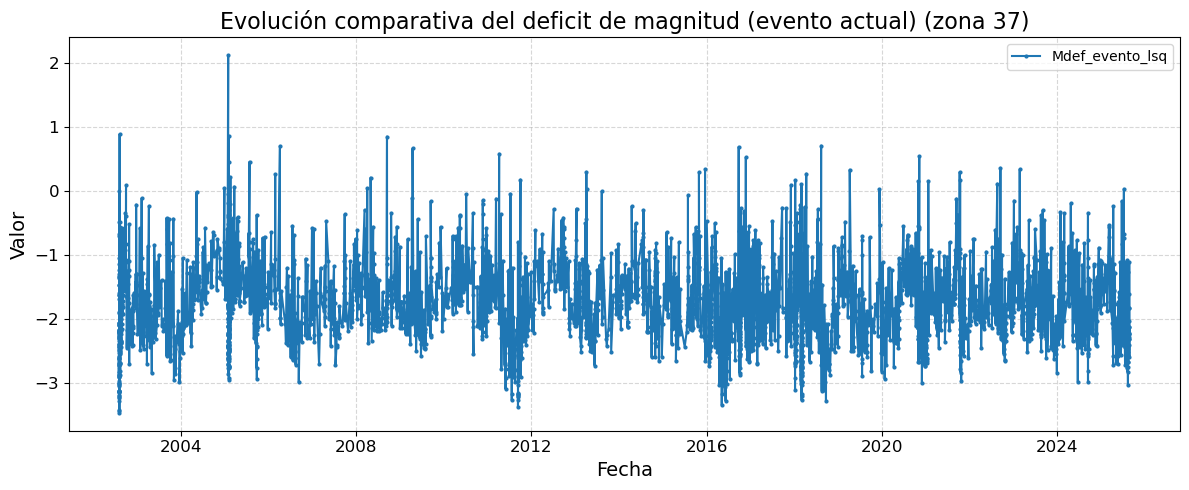

In [45]:
# Comparar evolución del deficit de magnitud (evento actual)

filename = f"Evolución comparativa del deficit de magnitud (evento actual) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_19, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_evento_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de T días previos al evento seleccionado

In [46]:
gdf_2002_20 = par.agregar_deficit_ventana_tiempo(gdf_2002_19, col_mag="Mag_mbLgL", fecha_col="FechaHora", T=180)

gdf_2002_20.tail()[["Mdef_Tdias_lsq","Mdef_Tdias_mlk"]]

,Mdef_Tdias_lsq,Mdef_Tdias_mlk
4455,-0.113139,-0.803460
4456,-0.117405,-0.779988
4457,0.015997,-0.701747
4458,0.091465,-0.600035
4459,0.167373,-0.719108


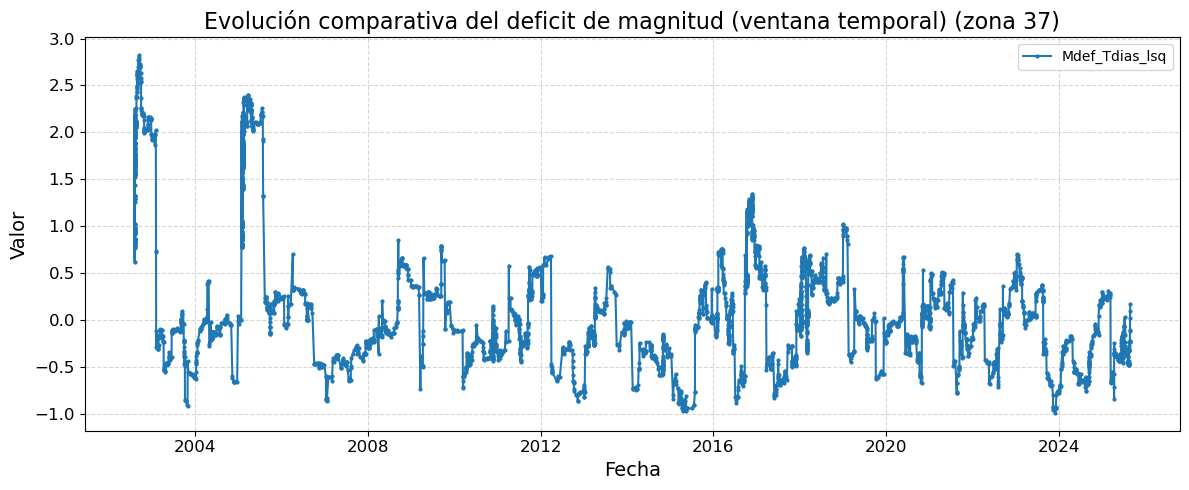

In [47]:
# Comparar evolución del deficit de magnitud (ventana temporal)

filename = f"Evolución comparativa del deficit de magnitud (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_20, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Tdias_lsq"], 
   output_file=output_file,
   titulo=filename
)

### c) Utiliza una ventana de N eventos previos al evento seleccionado

In [48]:
gdf_2002_21 = par.agregar_deficit_ventana_eventos(gdf_2002_20, col_mag="Mag_mbLgL", fecha_col="FechaHora", n_eventos=100)
gdf_2002_21.tail()[["Mdef_Neventos_lsq","Mdef_Neventos_mlk"]]

,Mdef_Neventos_lsq,Mdef_Neventos_mlk
4455,-0.113139,-0.803460
4456,-0.117405,-0.779988
4457,0.015997,-0.701747
4458,0.091465,-0.600035
4459,0.167373,-0.719108


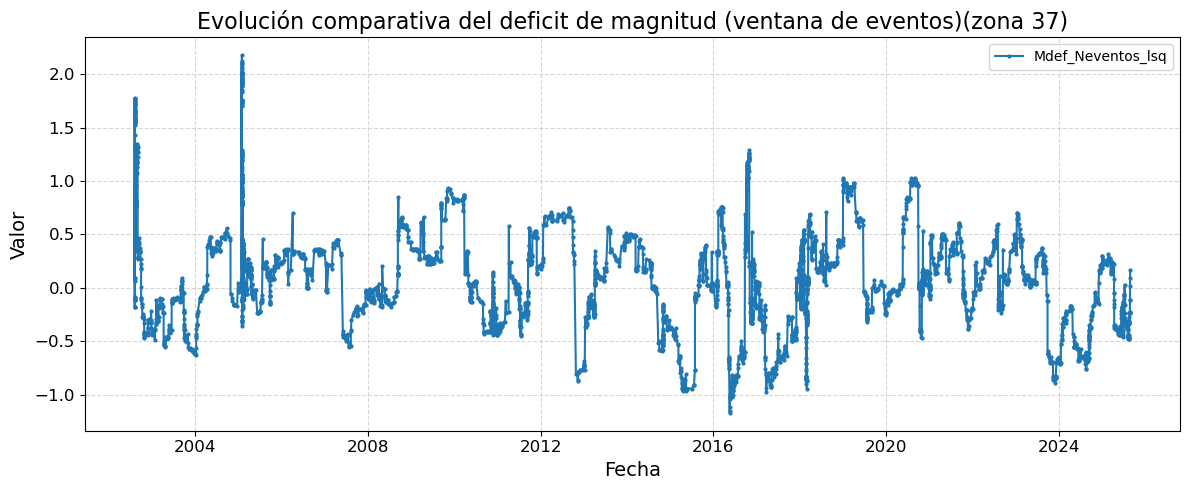

In [49]:
# Comparar evolución del deficit de magnitud (ventana de eventos)

filename = f"Evolución comparativa del deficit de magnitud (ventana de eventos)(zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_21, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Neventos_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 5. Tiempo de recurrencia total

La magnitud va desde 3.5 a 5.5 en intervalos de 0.1
a y b pueden tomar dos valores diferentes

In [50]:
gdf_2002_22 = par.agregar_tiempo_recurrencia(gdf_2002_21, fecha_col="FechaHora", Mmin=3.5, Mmax=5.5, step=0.1, unidad="años")

# Ver columnas nuevas
print(gdf_2002_22.filter(like="Trec_").tail())

      Trec_M3.5_lsq  Trec_M3.6_lsq  Trec_M3.7_lsq  Trec_M3.8_lsq  \
4455      32.086348      37.800399      44.532029      52.462452   
4456      31.804970      37.431656      44.053770      51.847417   
4457      40.923121      48.695785      57.944736      68.950372   
4458      47.570231      56.884795      68.023212      81.342604   
4459      55.419182      66.511825      79.824760      95.802397   

      Trec_M3.9_lsq  Trec_M4.0_lsq  Trec_M4.1_lsq  Trec_M4.2_lsq  \
4455      61.805152      72.811634      85.778189     101.053875   
4456      61.019855      71.815008      84.519955      99.472562   
4457      82.046344      97.629677     116.172804     138.237888   
4458      97.270020     116.316130     139.091593     166.326641   
4459     114.978100     137.991991     165.612317     198.761097   

      Trec_M4.3_lsq  Trec_M4.4_lsq  ...  Trec_M4.6_mlk  Trec_M4.7_mlk  \
4455     119.049909     140.250741  ...      46.892798      52.604761   
4456     117.070466     137.781653  

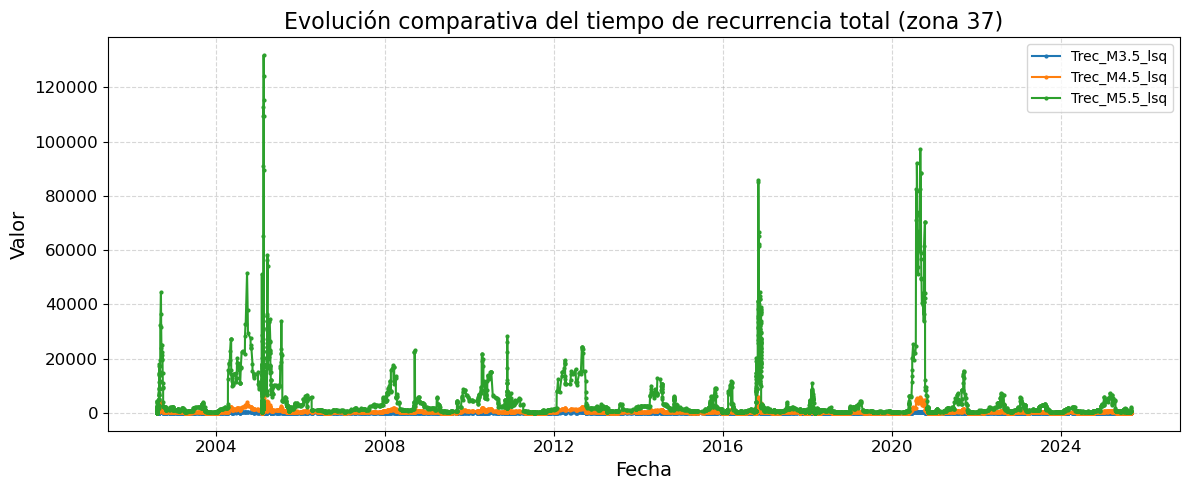

In [51]:
# Compar
filename = f"Evolución comparativa del tiempo de recurrencia total (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_22, 
   fecha_col="FechaHora", 
   param_cols=["Trec_M3.5_lsq","Trec_M4.5_lsq","Trec_M5.5_lsq"], 
   output_file=output_file,
   titulo=filename

)

### 6. Incremento del valor b

In [52]:

gdf_2002_23 = par.agregar_incrementos_b(gdf_2002_22, col_b1="b_lsq", col_b2="b_mlk")

# Ver las nuevas columnas

gdf_2002_23.filter(like="db_").tail()

,db_lsq_0_2,db_lsq_2_4,db_lsq_4_6,db_lsq_6_8,db_lsq_8_10,db_lsq_0_4,db_lsq_4_8,db_lsq_8_12,db_lsq_12_16,db_lsq_16_20,db_mlk_0_2,db_mlk_2_4,db_mlk_4_6,db_mlk_6_8,db_mlk_8_10,db_mlk_0_4,db_mlk_4_8,db_mlk_8_12,db_mlk_12_16,db_mlk_16_20
4455,0.037386,0.005576,-0.000181,0.023611,-0.003251,0.042962,0.023430,-0.006372,0.033134,-0.019537,0.010119,-0.006700,-0.002274,0.017630,-0.002135,0.003419,0.015356,0.005256,0.026507,-0.040419
4456,0.026324,0.006364,0.005113,0.023047,-0.001340,0.032689,0.028160,-0.013821,0.044004,-0.020094,0.019032,-0.007659,-0.002233,0.007728,-0.003282,0.011372,0.005495,-0.002183,0.034637,-0.039063
4457,0.043465,0.037386,0.005576,-0.000181,0.023611,0.080851,0.005395,0.020360,0.028481,-0.006651,0.015378,0.010119,-0.006700,-0.002274,0.017630,0.025497,-0.008974,0.015495,0.031100,-0.045455
4458,0.069169,0.026324,0.006364,0.005113,0.023047,0.095493,0.011478,0.021707,0.029978,-0.016910,0.028267,0.019032,-0.007659,-0.002233,0.007728,0.047298,-0.009892,0.004446,0.034787,-0.103936
4459,0.037161,0.043465,0.037386,0.005576,-0.000181,0.080627,0.042962,0.023430,-0.006372,0.033134,-0.017662,0.015378,0.010119,-0.006700,-0.002274,-0.002285,0.003419,0.015356,0.005256,0.026507


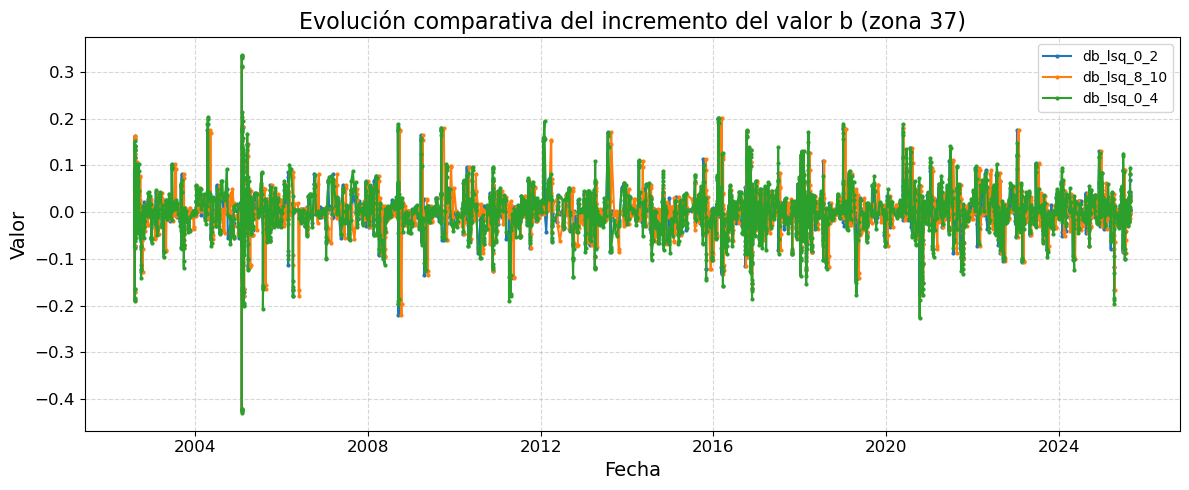

In [53]:
# Comparar evolución del incremento del valor b

filename = f"Evolución comparativa del incremento del valor b (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_23, 
   fecha_col="FechaHora", 
   param_cols=["db_lsq_0_2","db_lsq_8_10","db_lsq_0_4"], 
   output_file=output_file,
   titulo=filename

)

### 7. Coeficiente de agrupación

In [54]:


gdf_2002_24 = par.calcular_ccluster_aprox(
    gdf_2002_23,
    fecha_col="FechaHora",
    lat_col="Latitud",
    lon_col="Longitud",
    Tp_dias=30,
    eps_km=50,
    chunk_size=5000
 )

gdf_2002_24[["FechaHora", "Ccluster"]].tail()

Ccluster chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

,FechaHora,Ccluster
4455,2025-08-25 20:37:02,0.656880
4456,2025-08-25 21:31:46,0.649582
4457,2025-08-26 02:00:04,0.666720
4458,2025-08-26 21:21:20,0.683055
4459,2025-08-28 00:37:12,0.690489


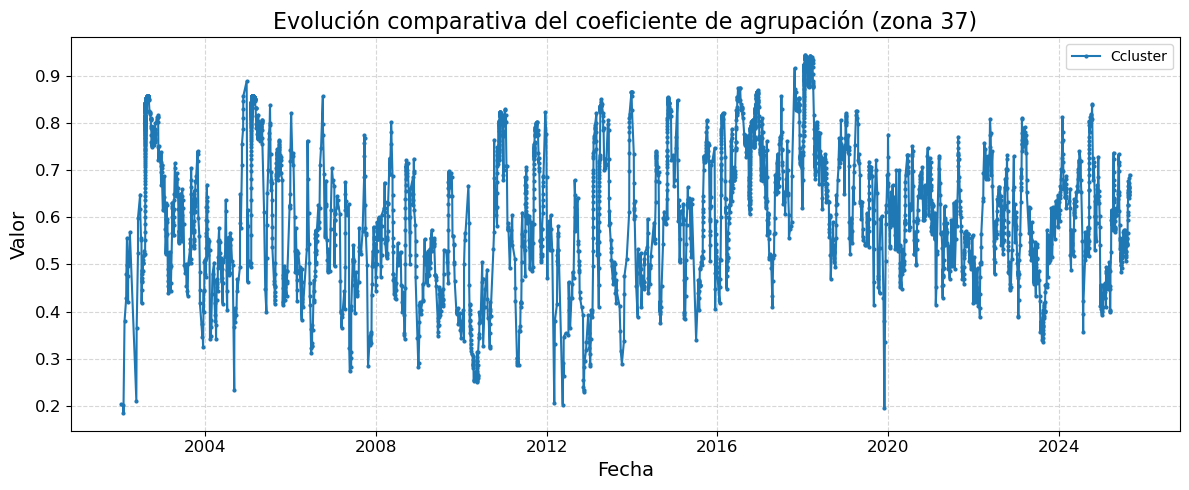

In [55]:
# Comparar evolución del coeficiente de agrupación

filename = f"Evolución comparativa del coeficiente de agrupación (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_24, 
   fecha_col="FechaHora", 
   param_cols=["Ccluster"], 
   output_file=output_file,
   titulo=filename
)

## GUARDA DATAFRAME  

In [56]:
# Guardar

filename = f"Dataframe_caracteristicas_entrada_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename
   
    
gdf_2002_24.to_pickle(output_file)
print(f"Guardado {filename} con {len(gdf_2002_24)} filas")


Guardado Dataframe_caracteristicas_entrada_zona_37.pkl con 4460 filas
